In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from DenStream import *

train = pd.read_csv("../input/train.csv", header=None)
stream = pd.read_csv("../input/stream.csv", header=None)
print("train/stream shape is:", train.shape, stream.shape)

train_label = pd.read_csv("../input/train_label.csv", header=None)
stream_label = pd.read_csv("../input/stream_label.csv", header=None)
print("train/stream label shape is:", train_label.shape, stream_label.shape)

train/stream shape is: (450, 2) (550, 2)
train/stream label shape is: (450, 1) (550, 1)


In [2]:
# # visualize
# fig = plt.figure(figsize=(9, 6))
# plt.plot(train[0], train[1], ".b", markersize=15)
# plt.plot(stream[0], stream[1], ".r", markersize=15)

# plt.grid()
# plt.show()

In [3]:
clusterer = DenStream(lambd=0.1, eps=1.5, beta=0.5, mu=3)
y = clusterer.fit_predict(train)


In [4]:
cluster_center = []
cluster_radius = []
for cluster in clusterer.p_micro_clusters:
#     print(cluster.center(), cluster.radius())
    cluster_center.append(cluster.center())
    cluster_radius.append(cluster.radius())

cluster_center = np.array(cluster_center)
cluster_radius = np.array(cluster_radius)
print(cluster_center.shape, cluster_radius.shape)

(16, 2) (16,)


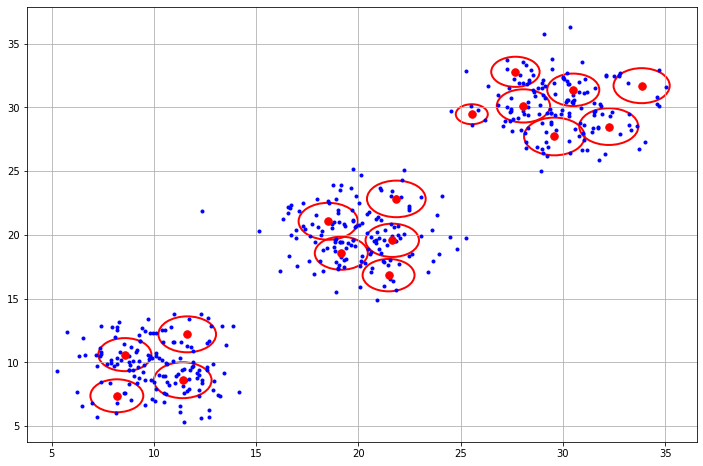

In [5]:
# visualize
fig, ax = plt.subplots(figsize=(12,8))
plt.plot(train[0], train[1], ".b", markersize=6)
plt.plot(cluster_center[:, 0], cluster_center[:, 1], ".r", markersize=15)
for idx in range(len(cluster_center)):
    circle = plt.Circle((cluster_center[idx, 0], cluster_center[idx, 1]), cluster_radius[idx], color='r', fill=False, lw=2)
    ax.add_artist(circle)
plt.grid()
plt.show()

In [6]:
print("There are", len(np.unique(y)), "clusters.")

There are 3 clusters.
